# Image Averging

### Importing librairies

In [8]:
# import the necessary packages
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

### Selecting the input video

In [9]:
input_video = "Data/hand_held_combined_out_100.avi"

### Initializing

In [10]:
#initialize the Red, Green, and Blue channel averages, along with
# the total number of frames read from the file
(rAvg, gAvg, bAvg) = (None, None, None)
total = 0

# open a pointer to the video file
print("[INFO] opening video file pointer...")
stream = cv2.VideoCapture(input_video)
# Get frame count
n_frames = int(stream.get(cv2.CAP_PROP_FRAME_COUNT))
print(n_frames)
assert n_frames>0

print("[INFO] computing frame averages (this will take awhile)...")

[INFO] opening video file pointer...
243
[INFO] computing frame averages (this will take awhile)...


### Calculating the average

In [11]:
# loop over frames from the video file stream
for i in tqdm(range(n_frames)):
    # grab the frame from the file stream
    (grabbed, frame) = stream.read()
 
    # if the frame was not grabbed, then we have reached the end of
    # the file
    if not grabbed:
        print('oopsie')
        break
 
    # otherwise, split the frmae into its respective channels
    (B, G, R) = cv2.split(frame.astype("float"))
    
    # if the frame averages are None, initialize them
    if rAvg is None:
        rAvg = R
        bAvg = B
        gAvg = G

    # otherwise, compute the weighted average between the history of
    # frames and the current frames
    else:
        rAvg = ((total * rAvg) + (1 * R)) / (total + 1.0)
        gAvg = ((total * gAvg) + (1 * G)) / (total + 1.0)
        bAvg = ((total * bAvg) + (1 * B)) / (total + 1.0)
    # increment the total number of frames read thus far
    total += 1

100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:07<00:00, 32.43it/s]


### Merging and generating the output

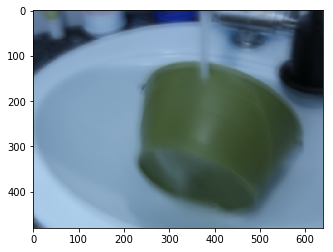

In [12]:
# merge the RGB averages together and write the output image to disk
avg = cv2.merge([bAvg, gAvg, rAvg]).astype("uint8")
plt.imshow(avg)
cv2.imwrite('{}_averaged.png'.format(input_video.split('.')[0]), avg)
 
# do a bit of cleanup on the file pointer
stream.release()